In [6]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import keras, os
import numpy as np
import pandas as pd
import warnings
import pickle
import zipfile

# Suppress all warnings
warnings.filterwarnings("ignore")

In [9]:
# loading
with open('model_feature_vectors.pickle', 'rb') as handle:
    model_feature_vectors = pickle.load(handle)

In [109]:
# features = model_feature_vectors.copy()
# features_lists={}
# for v in features['VGG16'].values():
#     features_lists[v]= {}

#     recommended_ids = {}

# for m in similar_images.keys():
#     recommended_ids[m] = []

#     for i in similar_images[m]:
#         id_=int(i[0].replace('.jpg',''))
#         # print(id_)
#         recommended_ids[m].append(id_)

TypeError: unhashable type: 'numpy.ndarray'

In [9]:
models = []
models.append(('VGG16', VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))))
models.append(('VGG19', VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))))
models.append(('ResNet50', ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))))

In [10]:
models[0][1]
models[0]
print(models)


[('VGG16', <keras.src.engine.functional.Functional object at 0x157cb58b0>), ('VGG19', <keras.src.engine.functional.Functional object at 0x157cdfca0>), ('ResNet50', <keras.src.engine.functional.Functional object at 0x157f12dc0>)]


In [11]:
def extract_feature_vector(image_path, model):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    feature_vector = model.predict(image)
    return feature_vector.flatten()

In [12]:
# folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/images'
# given_image_path = '/Users/adrianabrazon/Documents/IronHack/final_project/given_images/img_1066_720.jpeg'
# given_feature_vector = extract_feature_vector(given_image_path)

# # Get list of filenames from the folder path
# filenames = os.listdir(folder_path)

# # Shuffle the list of filenames
# np.random.shuffle(filenames)

# image_similarity_scores = {}
# for filename in filenames[:10]:
#     if filename.endswith(('.jpg', '.png', '.jpeg')):
#         image_path = os.path.join(folder_path, filename)
#         feature_vector = extract_feature_vector(image_path)
#         similarity_score = cosine_similarity([given_feature_vector], [feature_vector])[0][0]
#         image_similarity_scores[filename] = similarity_score
# top_5_similar_images = sorted(image_similarity_scores.items(), key=lambda x: x[1], reverse=True)[:5]


TypeError: extract_feature_vector() missing 1 required positional argument: 'model'

In [20]:
# finding similarities with each model:

folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/images'
given_image_path = '/Users/adrianabrazon/Documents/IronHack/final_project/given_images/1.jpeg'

similar_images = {}

for m in models:
    given_feature_vector = extract_feature_vector(given_image_path, m[1])

    image_similarity_scores = {}
    for filename, feature_vector in model_feature_vectors[m[0]].items():
        similarity_score = cosine_similarity([given_feature_vector], [feature_vector])[0][0]
        image_similarity_scores[filename] = similarity_score
    top_5_similar_images = sorted(image_similarity_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    similar_images[m[0]] = top_5_similar_images


1/1 [==============================] - 0s 363ms/step


In [21]:
print(top_5_similar_images)

[('13873885.jpg', 0.3542237), ('20306409.jpg', 0.33125317), ('10535078.jpg', 0.32947037), ('20193555.jpg', 0.30668133), ('19824212.jpg', 0.30667984)]


In [22]:
test = top_5_similar_images[1][1]
type(test)

numpy.float32

In [23]:
similar_images

{'VGG16': [('20306409.jpg', 0.33208585),
  ('20331647.jpg', 0.31798124),
  ('20252536.jpg', 0.28670448),
  ('20200647.jpg', 0.26000017),
  ('20150822.jpg', 0.25900468)],
 'VGG19': [('20306409.jpg', 0.3157593),
  ('20129404.jpg', 0.26183173),
  ('19431078.jpg', 0.2606326),
  ('20331647.jpg', 0.25762862),
  ('18820387.jpg', 0.25083297)],
 'ResNet50': [('13873885.jpg', 0.3542237),
  ('20306409.jpg', 0.33125317),
  ('10535078.jpg', 0.32947037),
  ('20193555.jpg', 0.30668133),
  ('19824212.jpg', 0.30667984)]}

In [24]:
similar_images.keys()


dict_keys(['VGG16', 'VGG19', 'ResNet50'])

In [7]:
recommended_ids = {}

for m in similar_images.keys():
    recommended_ids[m] = []

    for i in similar_images[m]:
        id_=int(i[0].replace('.jpg',''))
        # print(id_)
        recommended_ids[m].append(id_)
print(recommended_ids)

NameError: name 'similar_images' is not defined

In [54]:
# we load the DataFrame from which we will recommend dogs in adoption from: 

df = pd.read_csv('/Users/adrianabrazon/Documents/IronHack/final_project/dog_files/pets_for_adoption.csv')

In [27]:
df

,doggo_name,doggo_pic_url,doggo_url,animal_id
0,Keisha,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19921455
1,Mayflower,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20026683
2,George,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628021
3,Billie,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109890
4,Henry,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109891
...,...,...,...,...
19986,JC Penny,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19613415
19987,Nate,no photo,https://www.aspca.org/adopt-pet/adoptable-dogs...,19627552
19988,Rocket,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628000
19989,Hunter,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19642640


In [28]:
# recommended_images = {}
# recommended_images['123.jpg'] = 0.3456
# recommended_images['124.jpg'] = 0.3342
# recommended_images['125.jpg'] = 0.3156
# # recommended_images['126.jpg'] = 0.3023

# for i in range(len(image_similarity_scores)):
#     recommended_id1 = list(list(image_similarity_scores.keys())[i].split(".")[0])

In [29]:
print(recommended_ids)

{'VGG16': [20306409, 20331647, 20252536, 20200647, 20150822], 'VGG19': [20306409, 20129404, 19431078, 20331647, 18820387], 'ResNet50': [13873885, 20306409, 10535078, 20193555, 19824212]}


In [30]:
recommended_ids.items()

dict_items([('VGG16', [20306409, 20331647, 20252536, 20200647, 20150822]), ('VGG19', [20306409, 20129404, 19431078, 20331647, 18820387]), ('ResNet50', [13873885, 20306409, 10535078, 20193555, 19824212])])

In [31]:
# Given dictionary

data = {
    'VGG16': [20306409, 20331647, 20252536, 20200647, 20150822],
    'VGG19': [20306409, 20129404, 19431078, 20331647, 18820387],
    'ResNet50': [13873885, 20306409, 10535078, 20193555, 19824212]
}

# Loop through the dictionary
for m, values in similar_images.items():
    print(f"For {m}:")
    for value in values:
        print(value)



# Loop through the dictionary
dfs = {}  # Dictionary to store DataFrames for each model
for model, values in similar_images.items():
    filenames, similarities = zip(*values)
    df_model = pd.DataFrame({'Filename': filenames, 'Similarity': similarities})
    dfs[model] = df_model

    # Accessing the DataFrame for each model
    df_model = dfs[model]
    print(f"DataFrame for {model}:")
    print(df_model)
    print()  # Just for spacing between DataFrames

For VGG16:
('20306409.jpg', 0.33208585)
('20331647.jpg', 0.31798124)
('20252536.jpg', 0.28670448)
('20200647.jpg', 0.26000017)
('20150822.jpg', 0.25900468)
For VGG19:
('20306409.jpg', 0.3157593)
('20129404.jpg', 0.26183173)
('19431078.jpg', 0.2606326)
('20331647.jpg', 0.25762862)
('18820387.jpg', 0.25083297)
For ResNet50:
('13873885.jpg', 0.3542237)
('20306409.jpg', 0.33125317)
('10535078.jpg', 0.32947037)
('20193555.jpg', 0.30668133)
('19824212.jpg', 0.30667984)
DataFrame for VGG16:
       Filename  Similarity
0  20306409.jpg    0.332086
1  20331647.jpg    0.317981
2  20252536.jpg    0.286704
3  20200647.jpg    0.260000
4  20150822.jpg    0.259005

DataFrame for VGG19:
       Filename  Similarity
0  20306409.jpg    0.315759
1  20129404.jpg    0.261832
2  19431078.jpg    0.260633
3  20331647.jpg    0.257629
4  18820387.jpg    0.250833

DataFrame for ResNet50:
       Filename  Similarity
0  13873885.jpg    0.354224
1  20306409.jpg    0.331253
2  10535078.jpg    0.329470
3  20193555.jpg 

In [45]:
similar_images

{'VGG16': [('20306409.jpg', 0.33208585),
  ('20331647.jpg', 0.31798124),
  ('20252536.jpg', 0.28670448),
  ('20200647.jpg', 0.26000017),
  ('20150822.jpg', 0.25900468)],
 'VGG19': [('20306409.jpg', 0.3157593),
  ('20129404.jpg', 0.26183173),
  ('19431078.jpg', 0.2606326),
  ('20331647.jpg', 0.25762862),
  ('18820387.jpg', 0.25083297)],
 'ResNet50': [('13873885.jpg', 0.3542237),
  ('20306409.jpg', 0.33125317),
  ('10535078.jpg', 0.32947037),
  ('20193555.jpg', 0.30668133),
  ('19824212.jpg', 0.30667984)]}

In [46]:
recommended_ids

{'VGG16': [20306409, 20331647, 20252536, 20200647, 20150822],
 'VGG19': [20306409, 20129404, 19431078, 20331647, 18820387],
 'ResNet50': [13873885, 20306409, 10535078, 20193555, 19824212]}

In [42]:
top_5_similar_images[1]

('20306409.jpg', 0.33125317)

In [53]:
df

,doggo_name,doggo_pic_url,doggo_url,animal_id,similarity_score
0,Willow,https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,13873885,0.354224
4,Freddie & Foxtrot **Courtesy Post**,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20306409,0.331253
2,Heidi (GA),https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,10535078,0.329470
3,Skeeter,https://cdn.rescuegroups.org/7792/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20193555,0.306681
1,Bucatini (TX),https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19824212,0.306680


In [56]:
# Initialize an empty DataFrame to store filtered results

dfs = {}
# Iterate over the recommended IDs and filter the DataFrame
for m, ids in recommended_ids.items(): 
    temp_df=pd.DataFrame({'animal_id':ids,'similarity_score':[t[1] for t in similar_images[m]]})
    # Create an empty DataFrame and assign it to the dynamically generated name
    dfs[m] = df[df['animal_id'].isin(ids)].copy()
    dfs[m] = dfs[m].merge(temp_df, on='animal_id').sort_values(by='similarity_score', ascending=False)
    
    # for i in recommended_ids.items():
    # filtered_rows = df[df['animal_id'] == recommended_ids[m][1]]
    #     # Add a column to store the similarity score
    #     filtered_rows[m] = top_5_similar_images[i][m][1]
    #         # filtered_rows['RN50_similarity_score'] = top_5_similar_images[i][1]
            
    #         filtered_df = pd.concat([filtered_df, filtered_rows])

# Display the filtered DataFrame
for m, df in dfs.items():
    display(m)
    display(df)

'VGG16'

,doggo_name,doggo_pic_url,doggo_url,animal_id,similarity_score
1,Freddie & Foxtrot **Courtesy Post**,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20306409,0.332086
2,Shannon's Charlie Brown TX,https://cdn.rescuegroups.org/8444/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20331647,0.317981
3,Polska TX,https://cdn.rescuegroups.org/8444/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20252536,0.286704
4,Jewel Adult Sweetheart Uber Snuggler,https://cdn.rescuegroups.org/8130/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20200647,0.260000
0,Pippa (SC),https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20150822,0.259005


'VGG19'

,doggo_name,doggo_pic_url,doggo_url,animal_id,similarity_score
0,Freddie & Foxtrot **Courtesy Post**,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20306409,0.315759
3,Kiwi Barkville,https://cdn.rescuegroups.org/956/pictures/anim...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20129404,0.261832
4,Doja Sweet Gentle Loving Companion,https://cdn.rescuegroups.org/8130/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19431078,0.260633
2,Shannon's Charlie Brown TX,https://cdn.rescuegroups.org/8444/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20331647,0.257629
1,Candy,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,18820387,0.250833


'ResNet50'

,doggo_name,doggo_pic_url,doggo_url,animal_id,similarity_score
0,Willow,https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,13873885,0.354224
4,Freddie & Foxtrot **Courtesy Post**,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20306409,0.331253
2,Heidi (GA),https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,10535078,0.329470
3,Skeeter,https://cdn.rescuegroups.org/7792/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20193555,0.306681
1,Bucatini (TX),https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19824212,0.306680


In [118]:
df['similarity_score']

0    0.354224
4    0.331253
2    0.329470
3    0.306681
1    0.306680
Name: similarity_score, dtype: float32

In [124]:
model_comparison = ['VGG16_top_similarity:' ,df['similarity_score'][0]]

In [125]:
model_comparison

['VGG16_top_similarity:', 0.3542237]

In [ ]:
# filtered_df = df[df['animal_id']==recommended_id1[1]]

filtered_df = df[df['animal_id']==20306409]


filtered_df

,doggo_name,doggo_pic_url,doggo_url,animal_id
509,Freddie & Foxtrot **Courtesy Post**,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20306409


IndexError: single positional indexer is out-of-bounds

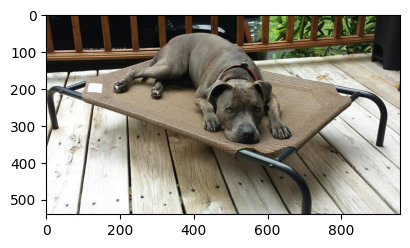

In [122]:
plt.figure(figsize=(7, 15))

# Display information for the top 1 dog
filename, similarity_score = top_5_similar_images[0]
image_path = os.path.join(folder_path, filename)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(5, 1, 1)  # 5 rows, 1 column, position 1
plt.imshow(image)
plt.title(f"Your match's name: {filtered_df.iloc[0]['doggo_name']}\nSimilarity: {similarity_score:.4f}")
plt.axis('off')

# # Display information for three additional options
# for i, (filename, similarity_score) in enumerate(top_5_similar_images):
#     if i < len(filtered_df):
#         image_path = os.path.join(folder_path, filename)
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.subplot(5, 1, i + 1)  # 5 rows, 1 column, position i+1
#         plt.imshow(image)
#         plt.title(f"Name: {filtered_df.iloc[i]['doggo_name']}\nDoggo URL: {filtered_df.iloc[i]['doggo_url']}\nSimilarity: {similarity_score:.4f}", loc='left')
#         plt.axis('off')

plt.tight_layout()
plt.show()

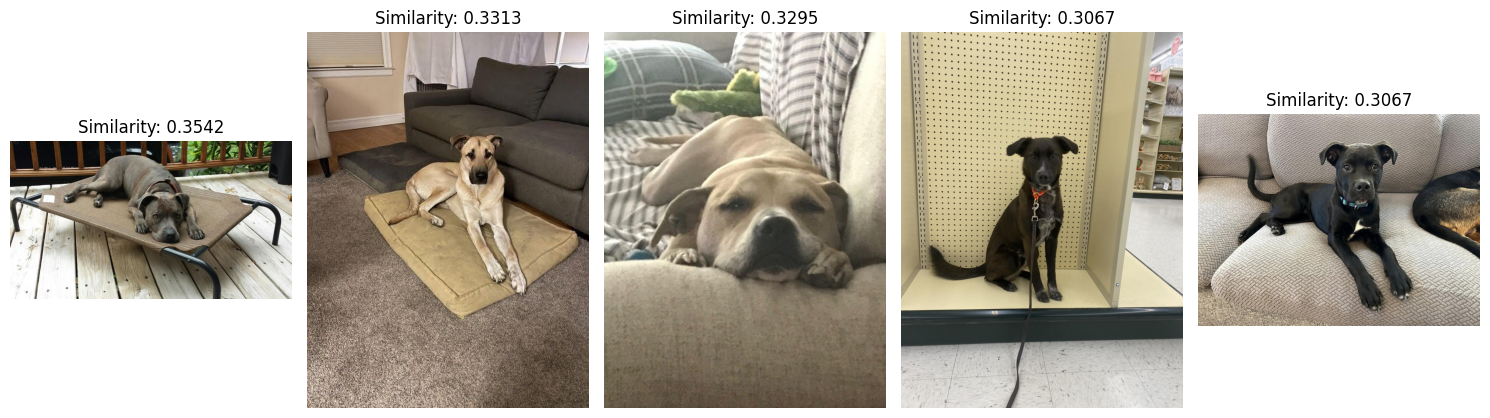

In [ ]:
plt.figure(figsize=(15, 10))
for i, (filename, similarity_score) in enumerate(top_5_similar_images):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Similarity: {similarity_score:.4f}")
    plt.axis('off')
plt.tight_layout()
plt.show()